In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov  5 21:06:15 2019

@author: kds @eddited : Joshua J Seo
"""
# wd: C:\Users\82104\AppData\Local\Programs\Python\Python39

from selenium import webdriver
from bs4 import BeautifulSoup
import time, random
import pandas as pd
import openpyxl
from selenium.webdriver.common.keys import Keys
            

# IMDB 리뷰 수집 함수

def imdb_get_review(serching_movie_title_id):
    # 크롬 브라우저 헤더 정보를 옵션으로 추가
    options = webdriver.ChromeOptions()
    # 다음 'options.add_argument'의 주석처리를 해제하면, 브라우저가 활성화 되지 않은 상태에서 웹 크롤링 수행
    # options.add_argument('headless')
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36")
    
    # 크롬 브라우저의 드라이버 경로 설정 및 옵션 적용
    driver = webdriver.Chrome(r'C:\Users\82108\AppData\Local\Programs\Python\Python39\chromedriver.exe', options=options)

    # serching_movie_title_id : 리뷰를 확인할 영화의 IMDB 코드 값
    imdb_review_page_url = "http://www.imdb.com/title/tt"+str(serching_movie_title_id)+"/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc"

    # 크롬 브라우저를 실행하여 웹 페이지 접속
    driver.get(imdb_review_page_url)
    # 브라우저 로딩 완료까지 10초 대기
    driver.implicitly_wait(10)

    # 리뷰 데이터 전체 확인
    for i in range(20): #1p:roughly 25comments
        try:
            # 다음과 같이 해결
            driver.find_element_by_xpath('//*[@id="load-more-trigger"]').send_keys(Keys.ENTER)
            print(str(i)+'page')


        except:
            # 마지막 리뷰의 스크린 샷 이미지 저장
            driver.save_screenshot(str(serching_movie_title_id)+'_screen.png')
            print('load complete')
            # 리뷰의 전체 로딩이 완료되어 더 이상 클릭할 속성이 없는 경우, break 종료"""
            break


    # 웹페이지 파싱
    imdb_review_virtual_page = driver.page_source
    imdb_review_pages = BeautifulSoup(imdb_review_virtual_page, 'html.parser')


    # 드라이브 종료, 크롬 브라우저는 로컬 컴퓨터의 메모리를 많이 사용하기 때문에, 페이지 파싱까지 완료되면 바로 종료
    driver.quit()


    # 리뷰별 타이틀, 날짜, 리뷰내용 저장을 위한 리스트 생성
    imdb_review_titles = []
    imdb_review_dates = []
    imdb_review_contents = []


    # 파싱 된 웹 페이지에서 데이터 선택, 각각 해당하는 리스트 변수에 저장하기
    for review_page in imdb_review_pages.find_all("div", {"class":"lister-item-content"}):
        title_tamp = review_page.find("a", {"class":"title"}).get_text()
        imdb_review_titles.append(title_tamp)

        date_tamp = review_page.find("span", {"class":"review-date"}).get_text()
        imdb_review_dates.append(date_tamp)

        content_tamp = review_page.find("div", {"class":"content"}).get_text()
        imdb_review_contents.append(content_tamp)

    return imdb_review_titles, imdb_review_dates, imdb_review_contents


    

if __name__ == "__main__":
    # Avengers: Infinity War (2018) - 4154756
    # Gisaengchung = 6751668
    # D-war = 0372873 (0으로시작할때는 문자열로)
    reviews = imdb_get_review('0372873')
    
    df = pd.DataFrame(reviews)#columns = ["titles", "dates", "contents"]
    df = df.transpose()
    df.to_excel('dwar.xlsx')
    print('끝!')

# 영화코드 입력
# 데이터 개수 확정
# 엑셀 파일 이름 


0page
1page
2page
3page
4page
5page
6page
7page
8page
9page
load complete
끝!


In [2]:
df

,0,1,2
0,"A review of ""D-War""\n",17 September 2007,"\nTo review ""D-War"" (sometimes called ""Dragon ..."
1,Great special effects...but they're completel...,17 September 2007,\nHow this movie got made with a supposedly $7...
2,A sloppy translation from Korean to English\n,26 May 2019,"\nApparently ""D-War"" was originally a Korean f..."
3,The worst major film I've seen in a long time\n,27 September 2007,\nI went into this movie with high hopes. Norm...
4,Comparisons to Boll and Sci-Fi Channel don't ...,19 September 2007,\nThis movie was not good. Let's start off wit...
...,...,...,...
265,"Plot unfolds too slow, gets boring.\n",3 February 2013,\nI gave this movie two stars simply because t...
266,I Have Never Seen Such Poor User Reviews\n,12 April 2013,\nUsually IMDb user reviews are pretty accurat...
267,Battle of good and evil in our time\n,18 November 2007,"\nYoung journalist, played by Jason Behr, must..."
268,"I've said this before, in lots of places, D-W...",29 August 2018,\nWhy do I think this? First of all - the drag...


In [3]:
df.columns = ['title','date','content']

In [4]:
df

,title,date,content
0,"A review of ""D-War""\n",17 September 2007,"\nTo review ""D-War"" (sometimes called ""Dragon ..."
1,Great special effects...but they're completel...,17 September 2007,\nHow this movie got made with a supposedly $7...
2,A sloppy translation from Korean to English\n,26 May 2019,"\nApparently ""D-War"" was originally a Korean f..."
3,The worst major film I've seen in a long time\n,27 September 2007,\nI went into this movie with high hopes. Norm...
4,Comparisons to Boll and Sci-Fi Channel don't ...,19 September 2007,\nThis movie was not good. Let's start off wit...
...,...,...,...
265,"Plot unfolds too slow, gets boring.\n",3 February 2013,\nI gave this movie two stars simply because t...
266,I Have Never Seen Such Poor User Reviews\n,12 April 2013,\nUsually IMDb user reviews are pretty accurat...
267,Battle of good and evil in our time\n,18 November 2007,"\nYoung journalist, played by Jason Behr, must..."
268,"I've said this before, in lots of places, D-W...",29 August 2018,\nWhy do I think this? First of all - the drag...


In [5]:
df.shape

(270, 3)

In [7]:
# SNA 코드 참고 해서 전처리 진행
# 전처리, 토큰화
# 워드클라우드
# 

In [8]:
df.nunique()

title      270
date       192
content    270
dtype: int64

In [9]:
df.isnull().sum()

title      0
date       0
content    0
dtype: int64

In [11]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [14]:
nltk.download('all')
nltk.download('popular')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\82108\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

True

In [15]:
def preprocessing(text):
    #tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    #remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    #remove words less than three letters
    tokens = [word for word in tokens if len(word)>= 3]
    
    #lower capitalization
    tokens = [word.lower() for word in tokens]
    
    #lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    
    preprocessed_text= ' '.join(tokens)
    return preprocessed_text

In [16]:
df['content_pre'] = df['content'].apply(lambda x : preprocessing(x))

In [17]:
df.head()

,title,date,content,content_pre
0,"A review of ""D-War""\n",17 September 2007,"\nTo review ""D-War"" (sometimes called ""Dragon ...",review d-war sometimes called dragon war drago...
1,Great special effects...but they're completel...,17 September 2007,\nHow this movie got made with a supposedly $7...,how movie got made supposedly million budget w...
2,A sloppy translation from Korean to English\n,26 May 2019,"\nApparently ""D-War"" was originally a Korean f...",apparently d-war originally korean film but in...
3,The worst major film I've seen in a long time\n,27 September 2007,\nI went into this movie with high hopes. Norm...,went movie high hope normally picky movie crea...
4,Comparisons to Boll and Sci-Fi Channel don't ...,19 September 2007,\nThis movie was not good. Let's start off wit...,this movie good let start but n't one two star...


In [18]:
#워드 클라우드
word_counts = df['content_pre'].apply(lambda x:len(x.split(' ')))

In [19]:
word_counts.head()

0    393
1    107
2    137
3    217
4    111
Name: content_pre, dtype: int64

In [20]:
word_counts.describe()

count    270.000000
mean     108.681481
std       63.291871
min       15.000000
25%       75.000000
50%       91.000000
75%      119.750000
max      509.000000
Name: content_pre, dtype: float64

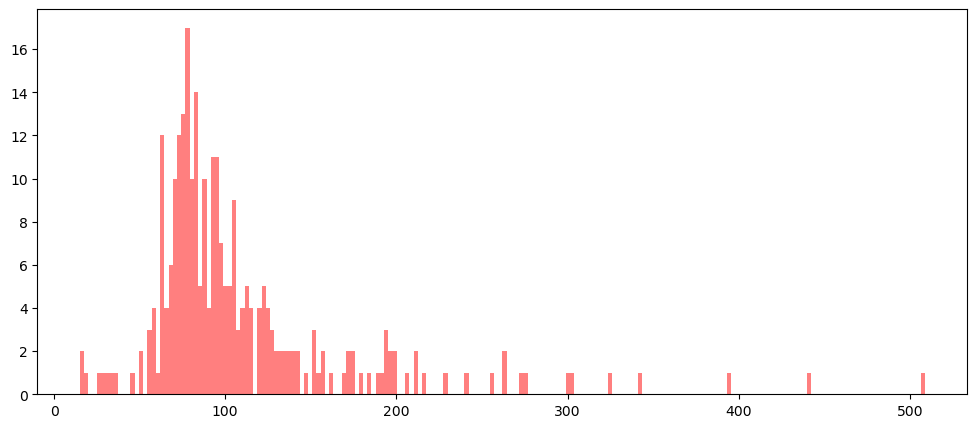

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.hist(word_counts, bins=200, alpha = 0.5, color='r', label='word')
plt.show()

<AxesSubplot:>

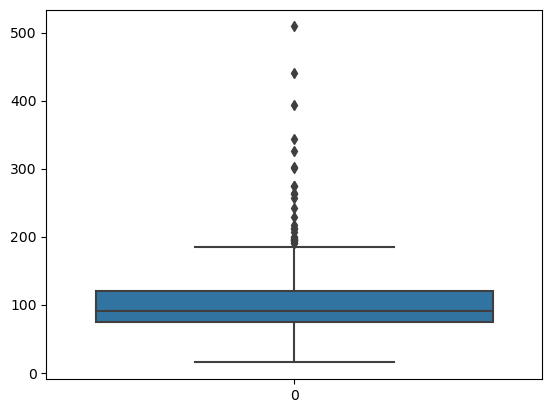

In [25]:
import seaborn as sns
plt.boxplot(word_counts, labels=['counts'], showmeans=True)
sns.boxplot(word_counts)

In [27]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


(-0.5, 799.5, 599.5, -0.5)

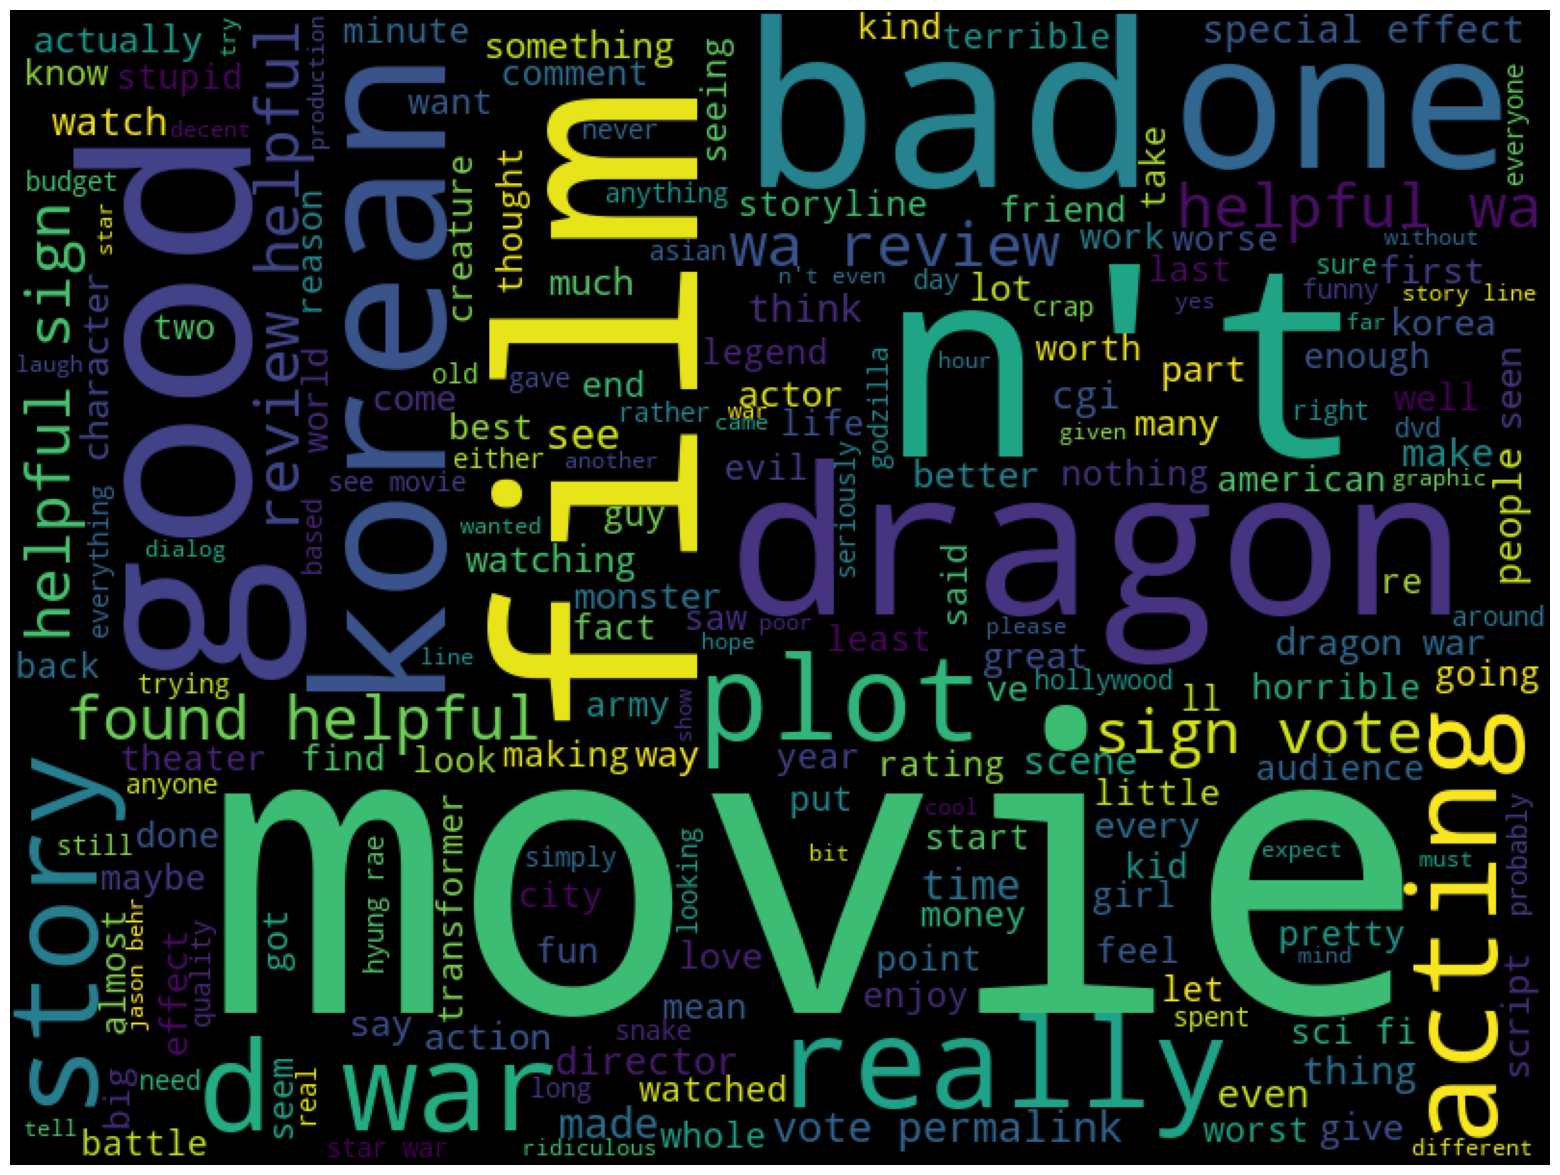

In [29]:
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height = 600).generate(' '.join(df['content_pre']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')